### Load libraries.

In [99]:
import geopandas as geopd
import pandas as pd
from shapely.geometry import box

### Load San Luis Potosi metropolitan area (SLPMA) shape file. Source: Marco Geoestadístico INEGI (2023).
#### URL: https://www.inegi.org.mx/temas/mg/ 

In [100]:
# INEGI data
gdf = geopd.read_file("../dataset/SLPMA/geometry/2023_1_24_A/2023_1_24_A.shp")

### Display data frame entries

- CVE_ENT: State code provided by INEGI.
- CVE_MUN: Municipality code provided by INEGI.
- CVE_LOC: Location code provided by INEGI.
- CVE_AGEB: Geographic area provided by INEGI.
- AMBITO: Urban or Rural area.
- geometry: Municipality boundary provided by INEGI (polygons).

In [101]:
display(gdf)

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,AMBITO,geometry
0,2400100010198,24,001,0001,0198,Urbana,"POLYGON ((-101.15796 22.39861, -101.15829 22.3..."
1,2400100010200,24,001,0001,0200,Urbana,"POLYGON ((-101.15675 22.39860, -101.15675 22.3..."
2,2400100010107,24,001,0001,0107,Urbana,"POLYGON ((-101.16092 22.40463, -101.16092 22.4..."
3,2400100010111,24,001,0001,0111,Urbana,"POLYGON ((-101.16742 22.40622, -101.16756 22.4..."
4,2400100010145,24,001,0001,0145,Urbana,"POLYGON ((-101.16331 22.40754, -101.16353 22.4..."
...,...,...,...,...,...,...,...
1577,2405800010237,24,058,0001,0237,Urbana,"POLYGON ((-99.30914 22.53072, -99.30760 22.528..."
1578,2405800010218,24,058,0001,0218,Urbana,"POLYGON ((-99.33210 22.54050, -99.33291 22.540..."
1579,2405800010148,24,058,0001,0148,Urbana,"POLYGON ((-99.32573 22.52434, -99.32573 22.524..."
1580,2405800010133,24,058,0001,0133,Urbana,"POLYGON ((-99.33050 22.53016, -99.33043 22.530..."


### San Luis Potosi metropilitan area consist of two municipalities: San Luis Potosí and Soledad de Graciasno Sánchez (SGS).

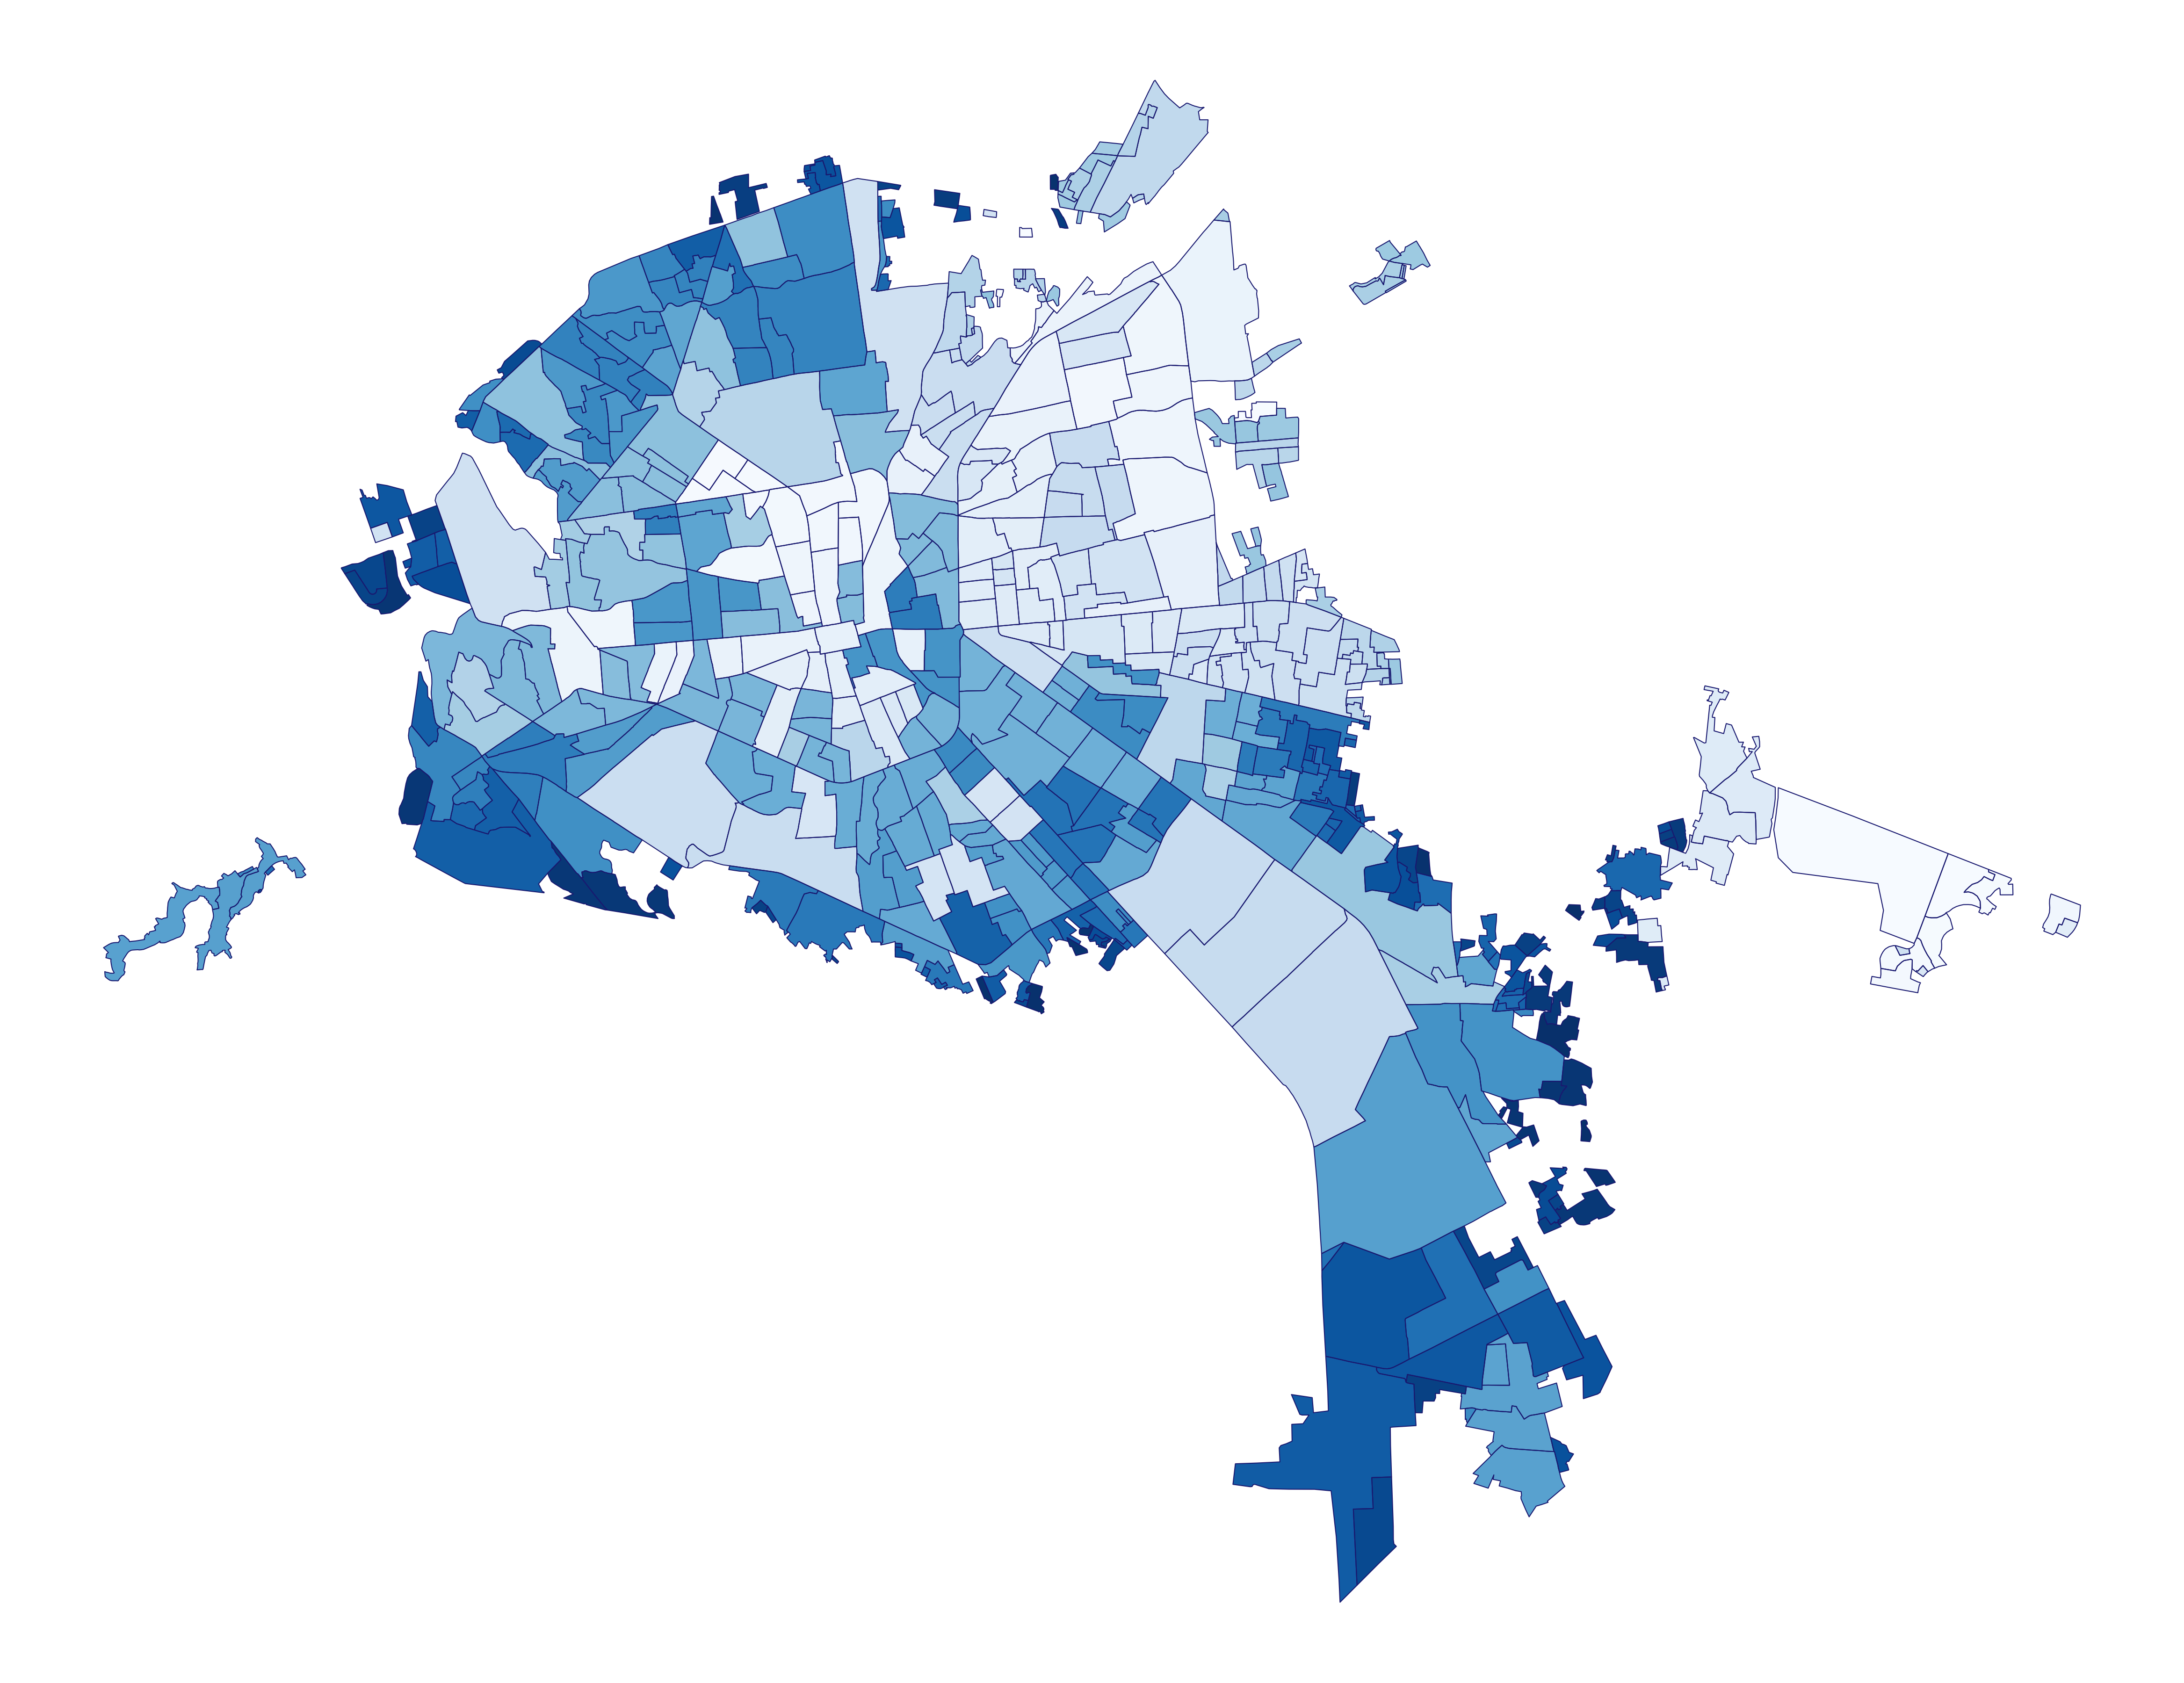

In [107]:
# SLPMA's map labeling each state by a color. 
# AGEBS are identified bya a CVE_ENT code

# SLP
gdf_slp = gdf[gdf["CVE_MUN"] == "028"]

#SGS
gdf_sgs = gdf[ gdf["CVE_MUN"] == "035"]

# Concatenate frames
frames = [gdf_slp, gdf_sgs ]
gdf_zmslp = pd.concat(frames)


# Plot AGEBS
ax = gdf_zmslp.plot(figsize = (60, 60), column="CVE_AGEB", cmap = "Blues")
ax.set_axis_off()

# Include AGEB outlines.
gdf_zmslp.boundary.plot(ax=ax,figsize = (60, 60), edgecolor='midnightblue')
ax.set_axis_off()



### Load stationary pollution sources data.

#### Stationary pollution sources in SLP. Display data frame entries. Source DENUE-INEGI.
#### URL: https://www.inegi.org.mx/app/mapa/denue/default.aspx

- cve_ent: State code provided by INEGI.
- nom_ent: Municipality name provided by INEGI.
- actividad: Industrial activity.
- geometry: Geographical coordinates, longitude and latitude.


In [104]:
df = pd.read_csv("../dataset/Mexico/stationary_pollution_sources/stationary_pollution_sources.csv")
df_slp = df[ df["cve_ent"] == 24 ] 
gdf_stationary_pullution_sources = geopd.GeoDataFrame(
    df_slp, geometry=geopd.points_from_xy(df_slp.X,df_slp.Y, crs="epsg:4326",
))

In [104]:
display(gdf_stationary_pullution_sources)

,id,cve_ent,nom_ent,actividad,X,Y,Unnamed: 6,geometry
0,FQ1,24,San Luis Potosí,Fabricacion de Quimicos,-100.876628,22.102930,NaN,POINT (-100.87663 22.10293)
1,FQ2,24,San Luis Potosí,Fabricacion de Quimicos,-100.992320,22.166703,NaN,POINT (-100.99232 22.16670)
2,FQ3,24,San Luis Potosí,Fabricacion de Quimicos,-100.879019,22.069436,NaN,POINT (-100.87902 22.06944)
3,FQ4,24,San Luis Potosí,Fabricacion de Quimicos,-100.893507,22.061079,NaN,POINT (-100.89351 22.06108)
4,FQ5,24,San Luis Potosí,Fabricacion de Quimicos,-100.882499,22.071247,NaN,POINT (-100.88250 22.07125)
...,...,...,...,...,...,...,...,...
771,BIOTAMC03,24,San Luis Potosí,Biomasa,-98.814128,21.560987,NaN,POINT (-98.81413 21.56099)
772,BIOTANES01,24,San Luis Potosí,Biomasa,-98.663943,21.599224,NaN,POINT (-98.66394 21.59922)
773,BIOTANES02,24,San Luis Potosí,Biomasa,-98.662509,21.600438,NaN,POINT (-98.66251 21.60044)
774,BIOTANES03,24,San Luis Potosí,Biomasa,-98.661218,21.604151,NaN,POINT (-98.66122 21.60415)


### Plot stationary pollution sources on SLPMA map.

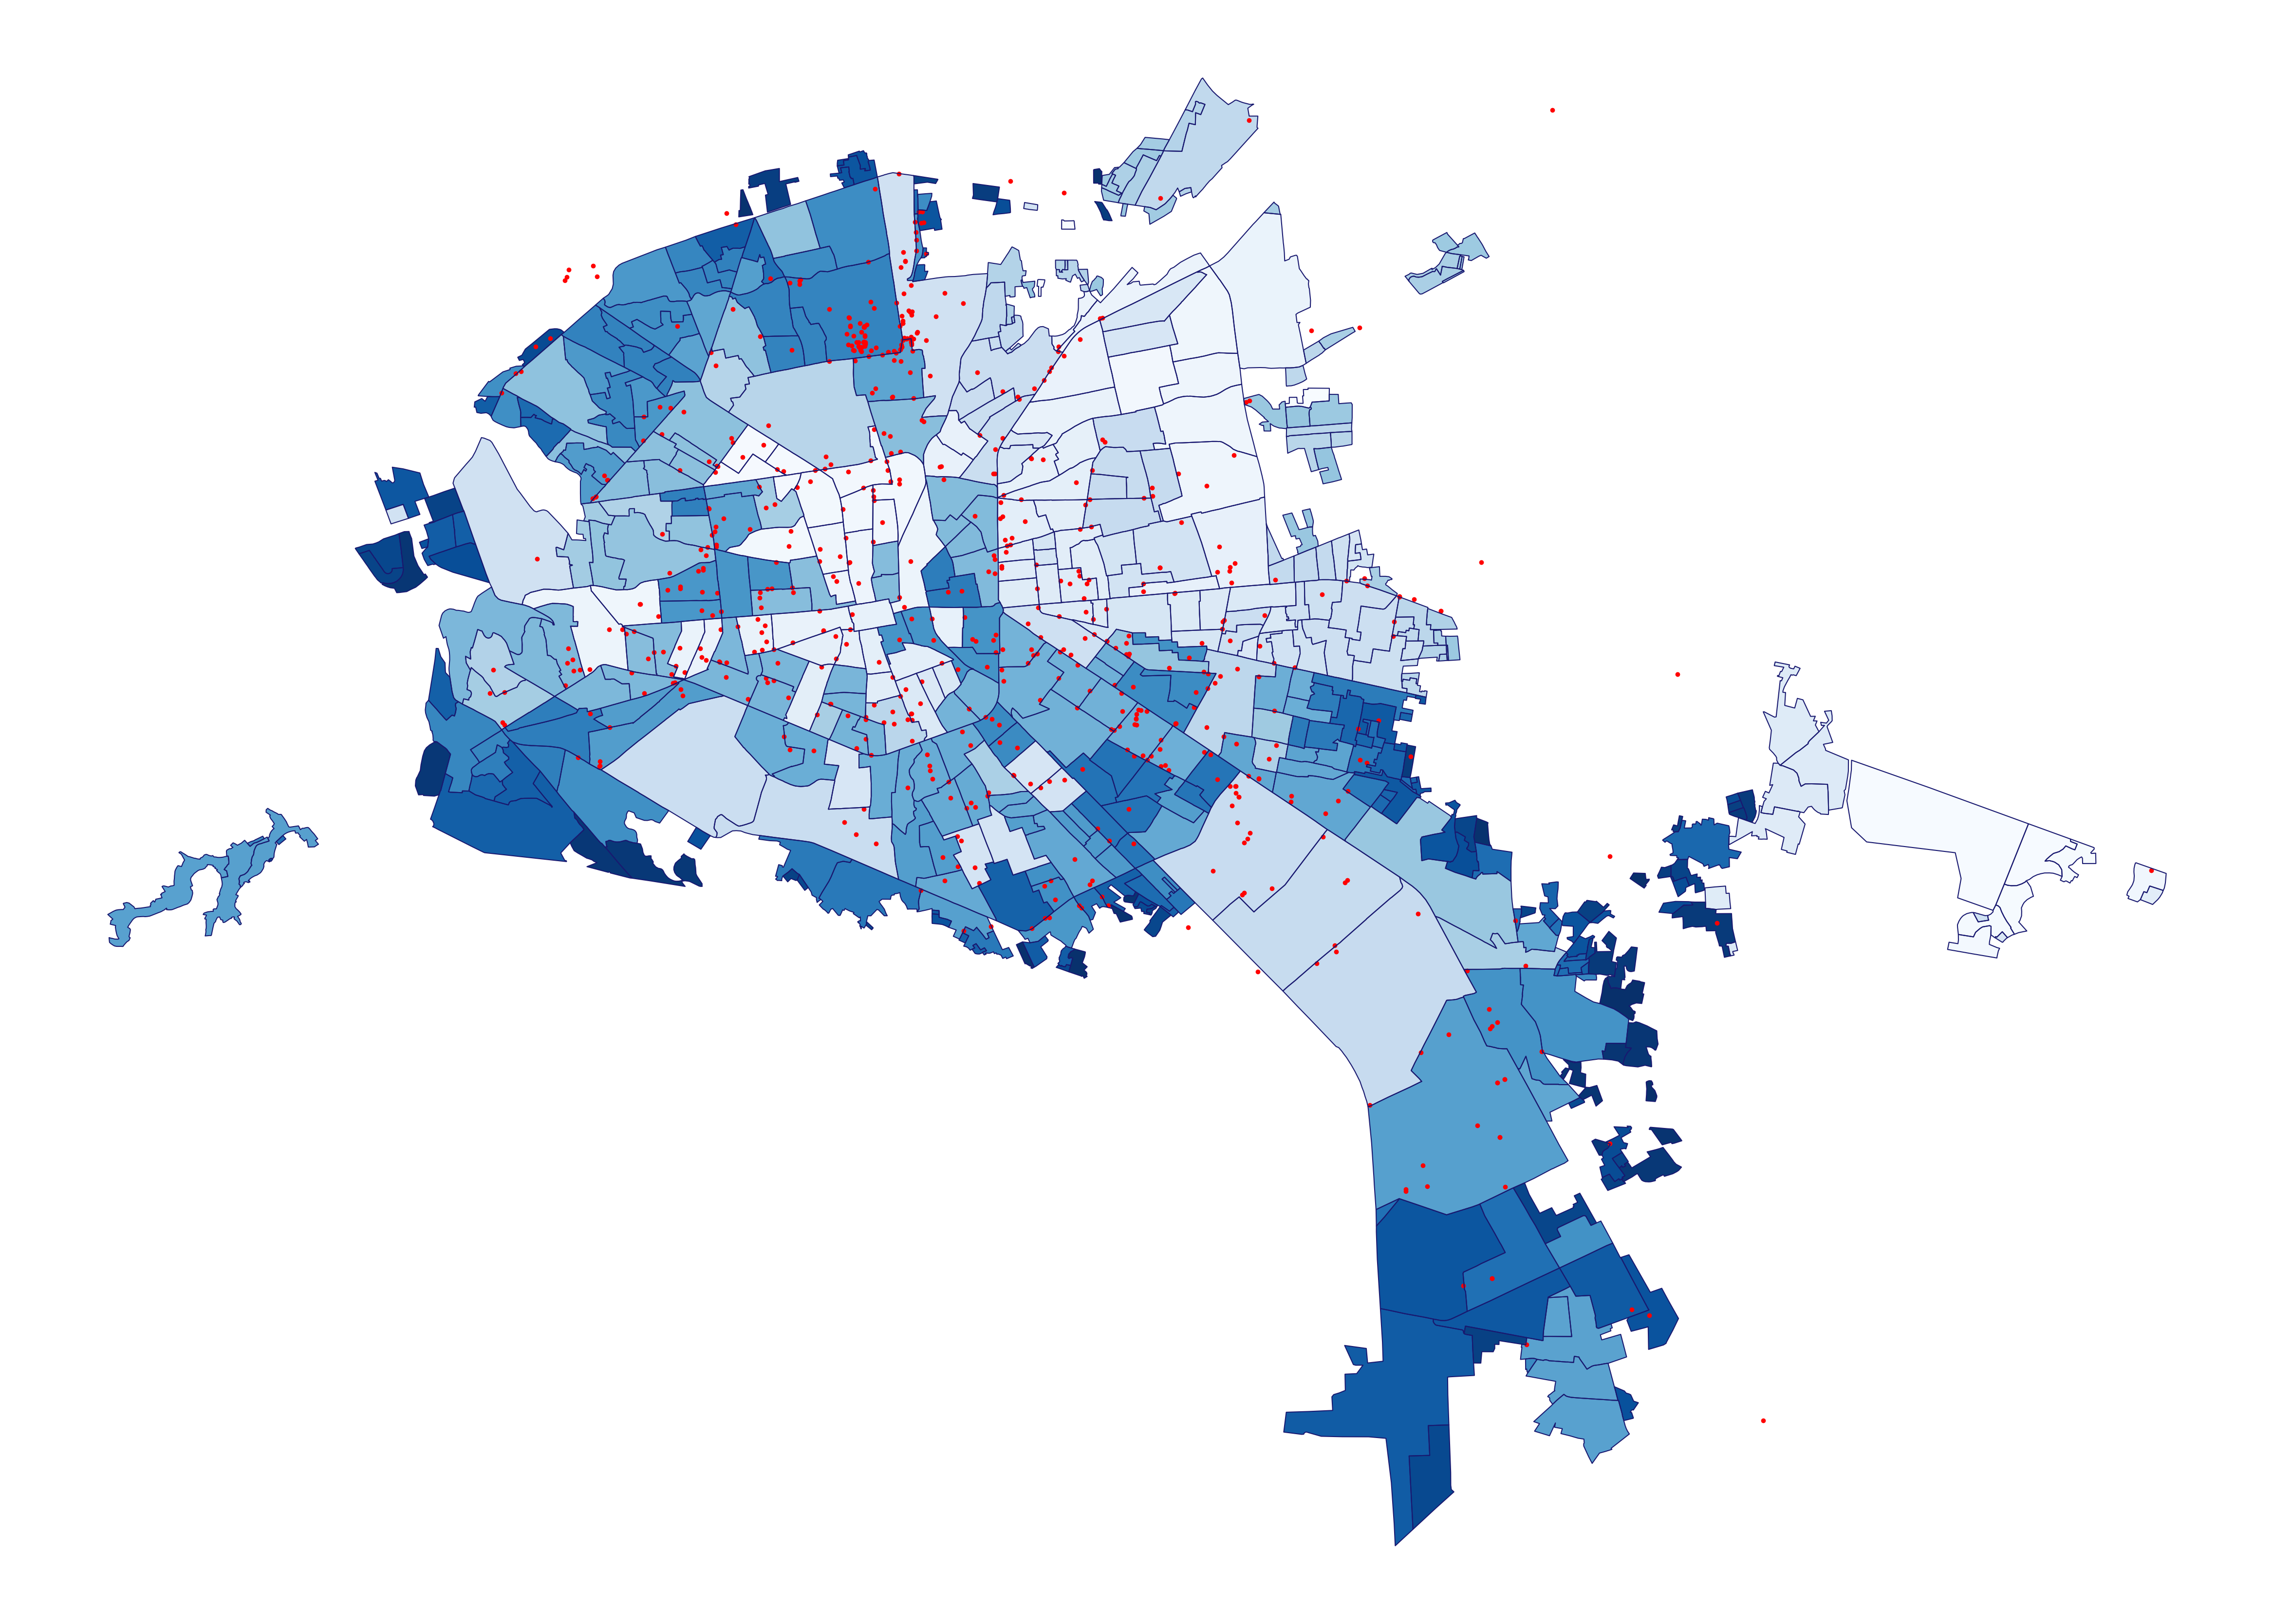

In [111]:
# Clip data to include sources inside SLPMA
minx, miny, maxx, maxy = gdf_zmslp.geometry.total_bounds
bbox = box(minx,miny,maxx,maxy)
gdf_stationary_pullution_sources_clipped = gdf_stationary_pullution_sources.clip(bbox)

# Plot AGEBS and AGEB outlines.
ax = gdf_zmslp.plot(figsize = (60, 60), column="CVE_AGEB", cmap = "Blues")
ax = gdf_zmslp.boundary.plot(ax=ax,figsize = (60, 60), edgecolor='midnightblue')

gdf_stationary_pullution_sources_clipped.plot(ax=ax,figsize = (100, 100),aspect=1, color="red")
ax.set_axis_off()